## Dead time analysis



In [196]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from datetime import date, time
import datetime

## Zynq files

In [222]:
filename = 'test_data/session8.hvps.log.txt'
search_str = "NEW_FILE"

# Grab NEW_FILE logs
lines = [line.rstrip('\n') for line in open(filename) if (search_str in line)]

In [224]:
month = 12 # session 8
#month = 1 # session 9

day = []
timestamp = []
for l in lines:
    start = l.find(search_str)
    d = l[start-21:start-10]
    day.append(date(int(d[7:11]), month, int(d[0:2])))
    ts = l[start-9:start-1]
    timestamp.append(time(hour=int(ts[0:2]), minute=int(ts[3:5]), 
                          second=int(ts[6:8])))
# Combine day and timestamp
zynq_dt = [ datetime.datetime.combine(d, t) for d, t in zip(day, timestamp) ]

In [225]:
dt = np.array(zynq_dt[1:]) - np.array(zynq_dt[:-1])
dt = np.array([_.seconds for _ in dt])

In [258]:
plt.style.use('minimalist')

Text(0.5, 0, 'File number in list')

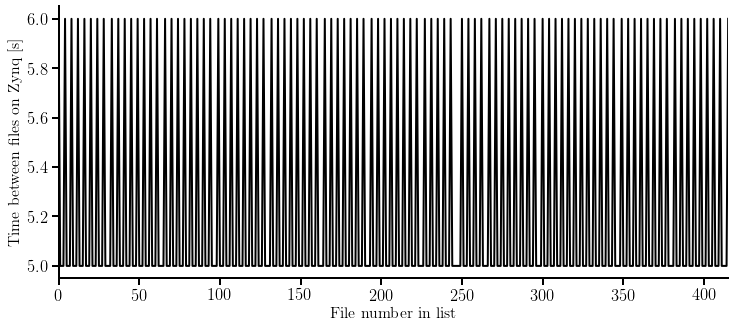

In [260]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
ax.plot(dt[dt<500], '-')
ax.set_ylabel('Time between files on Zynq [s]', fontsize=16)
ax.set_xlabel('File number in list', fontsize=16)

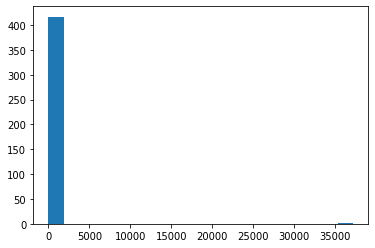

In [227]:
fig, ax = plt.subplots()
ax.hist(dt, bins=20);

## CPU files

In [261]:
filename = 'test_data/CPU_MAIN__2019_12_30__18_09_57.log'
search_str = "with name frm_cc"

lines = [line.rstrip('\n') for line in open(filename) if (search_str in line) and len(line)<100]

In [262]:
day = []
timestamp = []
for l in lines:
    print(l)
    start = l.find(search_str)
    d = l[start-50:start-40]
    ts = l[start-39:start-24]
    day.append(date(int(d[0:4]), int(d[5:7]), int(d[8:10])))
    timestamp.append(time(hour=int(ts[0:2]), minute=int(ts[3:5]), 
                          second=int(ts[6:8]), microsecond=int(ts[9:15])))
cpu_dt = [ datetime.datetime.combine(d, t) for d, t in zip(day, timestamp) ]

2019/12/30 18:11:21.255163 info: new file created with name frm_cc_00000000.dat
2019/12/30 18:11:31.881294 info: new file created with name frm_cc_00000001.dat
2019/12/30 18:11:42.643501 info: new file created with name frm_cc_00000002.dat
2019/12/30 18:11:53.169495 info: new file created with name frm_cc_00000003.dat
2019/12/30 18:12:03.800448 info: new file created with name frm_cc_00000004.dat
2019/12/30 18:12:14.673383 info: new file created with name frm_cc_00000005.dat
2019/12/30 18:12:25.811813 info: new file created with name frm_cc_00000006.dat
2019/12/30 18:12:35.716331 info: new file created with name frm_cc_00000007.dat
2019/12/30 18:12:46.089087 info: new file created with name frm_cc_00000008.dat
2019/12/30 18:12:55.547544 info: new file created with name frm_cc_00000009.dat
2019/12/30 18:13:03.549080 info: new file created with name frm_cc_00000010.dat
2019/12/30 18:13:11.446793 info: new file created with name frm_cc_00000011.dat
2019/12/30 18:13:19.423737 info: new fil

Text(0.5, 0, 'File number in list')

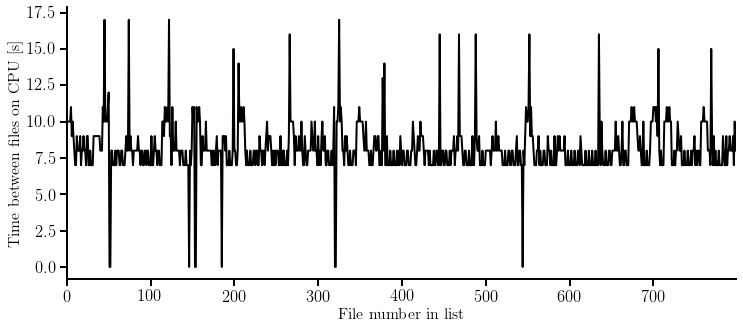

In [265]:
dt = np.array(cpu_dt[1:]) - np.array(cpu_dt[:-1])
dt = np.array([_.seconds for _ in dt])

fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
ax.plot(dt[dt<500])
ax.set_ylabel('Time between files on CPU [s]', fontsize=16)
ax.set_xlabel('File number in list', fontsize=16)

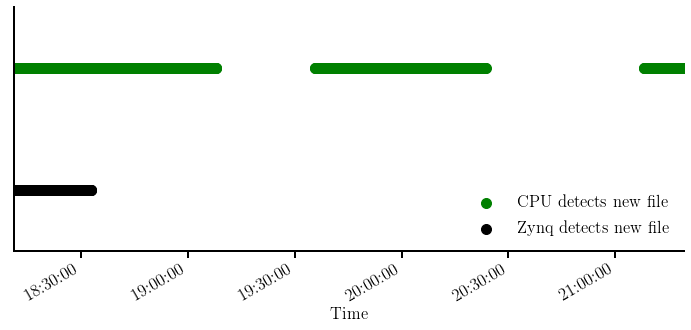

In [277]:
fig, ax = plt.subplots()
fig.set_size_inches((12, 5))
ax.scatter(cpu_dt, np.tile(1.0, len(cpu_dt)), color='g',  
           label='CPU detects new file', s=100)
ax.scatter(zynq_dt, np.tile(0.5, len(zynq_dt)), color='k',
           label='Zynq detects new file', s=100)
ax.set_xlim(min(zynq_dt), max(cpu_dt))
myFmt = mdates.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()
ax.set_xlabel('Time')
ax.get_yaxis().set_visible(False)
ax.set_ylim(0.25, 1.25)
ax.legend()

In [243]:
print(zynq_dt[-1])
print(cpu_dt[-1])

2019-12-31 05:18:17
2019-12-30 21:19:13.814255


In [248]:
len(zynq_dt)*2

838

In [247]:
len(cpu_dt)

803